## Task 1: Importing Libraries

In [1]:
import keras
import os
import shutil
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from platform import python_version

print('Python version:', python_version())
print('Numpy version:', np.__version__)
print('Seaborn version:', sns.__version__)
from distutils.dir_util import copy_tree

Python version: 3.7.6
Numpy version: 1.17.5
Seaborn version: 0.10.0


In [2]:
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator

## Task 2: Dataset Creation

In [3]:
#for Collecting varous animal image data in a singledirectory called "data"
os.mkdir("data")


#os.mkdir("train_data/")
#os.mkdir("test_data/")
#os.rmdir("train_data/")
#os.rmdir("test_data/")
#rm -rf *

In [4]:
#copying all data from different sources to single directory
fromDirectory="../input/african-wildlife/"
toDirectory="./data/"
copy_tree(fromDirectory,toDirectory)
fromDirectory="../input/animal-classification/"
copy_tree(fromDirectory,toDirectory)
fromDirectory="../input/cheetahtigerwolf/ANIMAL-N30/ANIMALS/"
copy_tree(fromDirectory,toDirectory)
fromDirectory="../input/cheetahtigerwolf/ANIMALS/ANIMALS/"
copy_tree(fromDirectory,toDirectory)
fromDirectory="../input/animal-detection-small-dataset/train/train/"
copy_tree(fromDirectory,toDirectory)


['./data/rhinoceros/Img-12369.jpg',
 './data/rhinoceros/Img-4976.jpg',
 './data/rhinoceros/Img-7604.jpg',
 './data/rhinoceros/Img-5039.jpg',
 './data/rhinoceros/Img-8456.jpg',
 './data/rhinoceros/Img-2654.jpg',
 './data/rhinoceros/Img-12674.jpg',
 './data/rhinoceros/Img-11614.jpg',
 './data/rhinoceros/Img-10484.jpg',
 './data/rhinoceros/Img-3301.jpg',
 './data/rhinoceros/Img-9165.jpg',
 './data/rhinoceros/Img-3464.jpg',
 './data/rhinoceros/Img-4501.jpg',
 './data/rhinoceros/Img-12596.jpg',
 './data/rhinoceros/Img-927.jpg',
 './data/rhinoceros/Img-10510.jpg',
 './data/rhinoceros/Img-8636.jpg',
 './data/rhinoceros/Img-11812.jpg',
 './data/rhinoceros/Img-101.jpg',
 './data/rhinoceros/Img-12460.jpg',
 './data/rhinoceros/Img-1395.jpg',
 './data/rhinoceros/Img-1487.jpg',
 './data/rhinoceros/Img-4548.jpg',
 './data/rhinoceros/Img-1187.jpg',
 './data/rhinoceros/Img-7866.jpg',
 './data/rhinoceros/Img-7887.jpg',
 './data/rhinoceros/Img-8976.jpg',
 './data/rhinoceros/Img-3708.jpg',
 './data/rhino

In [5]:
#convert names of all sub-directories in our data to lowercase
import os
path='./data/'
for file in os.listdir(path):
    if file!=file.lower():
        os.rename(path+file,file.lower())
#after this all the directories whose names were in uppercase gets converted to lowercase and comes outside ./data/ directory.

In [6]:
#copying all the directories from data which were already in lowercase and didn't came outside the ./data/ directory 
fromDirectory="./data/"
toDirectory="./"
copy_tree(fromDirectory,toDirectory)
#now all data is been converted to lowercase and are at ./


['./spyder/spyder/spyder.4174.jpeg',
 './spyder/spyder/spyder.2628.jpeg',
 './spyder/spyder/spyder.1657.jpeg',
 './spyder/spyder/spyder.2514.jpeg',
 './spyder/spyder/spyder.3989.jpeg',
 './spyder/spyder/spyder.3739.jpeg',
 './spyder/spyder/spyder.4745.jpeg',
 './spyder/spyder/spyder.1634.jpeg',
 './spyder/spyder/spyder.781.jpeg',
 './spyder/spyder/spyder.4426.jpeg',
 './spyder/spyder/spyder.1887.jpeg',
 './spyder/spyder/spyder.2434.jpeg',
 './spyder/spyder/spyder.501.jpeg',
 './spyder/spyder/spyder.970.jpeg',
 './spyder/spyder/spyder.2688.jpeg',
 './spyder/spyder/spyder.2646.jpeg',
 './spyder/spyder/spyder.922.jpeg',
 './spyder/spyder/spyder.1425.jpeg',
 './spyder/spyder/spyder.2510.jpeg',
 './spyder/spyder/spyder.513.jpeg',
 './spyder/spyder/spyder.2719.jpeg',
 './spyder/spyder/spyder.1094.jpeg',
 './spyder/spyder/spyder.1987.jpeg',
 './spyder/spyder/spyder.4368.jpeg',
 './spyder/spyder/spyder.4206.jpeg',
 './spyder/spyder/spyder.2760.jpeg',
 './spyder/spyder/spyder.745.jpeg',
 './spy

In [7]:
#delete all files inside ./data/
shutil.rmtree('./data/') 
os.remove("data.py")

In [ ]:
# apply following commands on console:
# cd ..
# mkdir data;mv working/* data/;mv data working/;
# cd working;


In [ ]:
# Remove all the redundancy from data manually.
"""
cd data
ls|grep cat
mv bobcat/* cat/
mv cats/* cat/
mv persian+cat/* cat/
mv siamese+cat/* cat/
ls|grep cat
rm -rf bobcat/
ls|grep cat
rm -rf cats
rm -rf siamese+cat/
rm -rf persian+cat/
ls|grep cat
ls|grep dog
mv dogs/* dog
rmdir dogs
ls|grep dog
ls|grep monk
mv spider+monkey/* monkey
ls|grep monk
rmdir spider+monkey
ls|grep monk
ls|grep german
mv german+shepherd/* dog/
ls|grep german
rmdir german+shepherd
ls|grep german
ls|grep bear
mv grizzly+bear/* bear/
rmdir grizzly+bear
ls|grep bear
ls|grep rhin
mv rhino/* rhinoceros/
rmdir rhino
mv rhino/* rhinoceros/
ls|grep rhin
"""
#or
# cd data
# mv bobcat/* cat/;mv cats/* cat/;mv persian+cat/* cat/;mv siamese+cat/* cat/;rm -rf bobcat/;rm -rf cats;rm -rf siamese+cat/;rm -rf persian+cat/;mv dogs/* dog;rmdir dogs;mv spider+monkey/* monkey;rmdir spider+monkey;mv german+shepherd/* dog/;rmdir german+shepherd;mv grizzly+bear/* bear/;rmdir grizzly+bear;mv rhino/* rhinoceros/;rmdir rhino;rm -rf hen;rm -rf butterfly;rm -rf spyder;
# cd ..  

In [14]:
#create test data set
os.mkdir("test_data")

In [15]:
# make dirctories inside test_data with same name as of data
data_path='./data/'
test_path='./test_data/'

for name in os.listdir(data_path):
    os.mkdir(test_path+name)

In [16]:
# create test_data by taking 25% images from data

total_train_images,total_test_images,total_train_classes,total_test_classes=0,0,0,0
path="./data/"
for file in os.listdir(path):
    if "notebook" not in file:
        total_train_classes+=1
        total_images=len(os.listdir(path+file+"/"))
        test_image_count=(25/100)*total_images #25% for test and 75% for train
        for i in range(math.ceil(test_image_count)):
            img=random.choice(os.listdir(path+file+'/'))
            shutil.move(path+file+'/'+img,'./test_data/'+file+'/')
            #print(img)
        print(file,total_images,math.ceil(test_image_count))
        total_train_images+=(total_images-math.ceil(test_image_count))
        #print(file,math.ceil(test_image_count))
print("total train images are : ",total_train_images," and total train classes are : ",total_train_classes)

giraffe 866 217
penguins 814 204
porcupine 814 204
bear 1501 376
raccoon 346 87
dog 1664 416
monkey 1034 259
horse 2082 521
cheetah 829 208
rat 220 55
cow 904 226
crocodiles 801 201
chimpanzee 477 120
panda 846 212
beaver 133 34
collie 680 170
weasel 184 46
ox 501 126
snake 874 219
dalmatian 359 90
elephant 1595 399
killer+whale 193 49
squirrel 808 202
wolf 1308 327
rhinoceros 2002 501
walrus 879 220
kangaroo 832 208
tortoise 819 205
goat 807 202
zebra 1628 407
moose 1335 334
otter 519 130
tiger 721 181
chihuahua 386 97
mouse 124 31
rabbit 837 210
antelope 695 174
meerkat 858 215
lion 806 202
mole 60 15
buffalo 1358 340
hippopotamus 1374 344
squirel 834 209
bat 256 64
deer 920 230
cat 2138 535
seal 665 167
ostrich 810 203
total train images are :  31104  and total train classes are :  48


In [ ]:
#rename data as train data

# mv data train_data

In [ ]:
# cd test_data
# rmdir __notebook_source__.ipynb
# cd ..
# cd train_data
# rm -f __notebook_source__.ipynb
# cd ..

In [ ]:
#Total images in train_data = 31104
#Total images in test_data = 10392

## Task 3: Model Creation

In [52]:
model = Sequential()

In [53]:
#inputlayer : apply filters
model.add(Convolution2D(filters=32, 
                        kernel_size=(3,3), 
                        activation='relu',
                   input_shape=(64, 64, 3)
                       ))

In [54]:
# pooling layer where we are doing maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))

In [55]:
#adding one more convolution layer for better model
model.add(Convolution2D(filters=32, 
                        kernel_size=(3,3), 
                        activation='relu',
                       ))

In [56]:
#adding one more Pooling layer for better model
model.add(MaxPooling2D(pool_size=(2, 2)))

In [57]:
#adding one more convolution layer for better model
model.add(Convolution2D(filters=32, 
                        kernel_size=(3,3), 
                        activation='relu',
                       ))

In [58]:
#adding one more Pooling layer for better model
model.add(MaxPooling2D(pool_size=(2, 2)))

In [59]:
#layer in which we are converting 2d/3d image to 1d image i.e flattening
model.add(Flatten())

In [60]:
# layer: appling relu to give positive output from here our hidden layerrs starts
model.add(Dense(units=256, activation='relu'))

In [61]:
# layer: appling relu to give positive output from here our hidden layerrs starts
model.add(Dense(units=128, activation='relu'))

In [62]:
# layer: appling relu to give positive output from here our hidden layerrs starts
model.add(Dense(units=64, activation='relu'))

In [63]:
# output layer : Since we have to do multi-class classification so we'll apply softmax activation function 
# we have 48 classes of animals so output layer would have that many neurons.
model.add(Dense(units=48, activation='softmax'))

In [64]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

## Task 4: Image Augmentation

In [66]:
#url : https://keras.io/api/preprocessing/image/ 
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
        './train_data/',
        target_size=(64,64),
        batch_size=32,
        class_mode='categorical')
test_set = test_datagen.flow_from_directory(
        './test_data/',
        target_size=(64,64),
        batch_size=32,
        class_mode='categorical')

Found 40027 images belonging to 48 classes.
Found 12305 images belonging to 48 classes.


In [67]:
training_set.class_indices # to see classes of our dataset

{'antelope': 0,
 'bat': 1,
 'bear': 2,
 'beaver': 3,
 'buffalo': 4,
 'cat': 5,
 'cheetah': 6,
 'chihuahua': 7,
 'chimpanzee': 8,
 'collie': 9,
 'cow': 10,
 'crocodiles': 11,
 'dalmatian': 12,
 'deer': 13,
 'dog': 14,
 'elephant': 15,
 'giraffe': 16,
 'goat': 17,
 'hippopotamus': 18,
 'horse': 19,
 'kangaroo': 20,
 'killer+whale': 21,
 'lion': 22,
 'meerkat': 23,
 'mole': 24,
 'monkey': 25,
 'moose': 26,
 'mouse': 27,
 'ostrich': 28,
 'otter': 29,
 'ox': 30,
 'panda': 31,
 'penguins': 32,
 'porcupine': 33,
 'rabbit': 34,
 'raccoon': 35,
 'rat': 36,
 'rhinoceros': 37,
 'seal': 38,
 'snake': 39,
 'squirel': 40,
 'squirrel': 41,
 'tiger': 42,
 'tortoise': 43,
 'walrus': 44,
 'weasel': 45,
 'wolf': 46,
 'zebra': 47}

## Task 5: Model Training

In [68]:
history = model.fit(
        training_set,
        steps_per_epoch=(40483/32),
        epochs=100,
        validation_data=test_set,
        validation_steps=(11849/32))
#Total images in train_data = 40483
#Total images in test_data = 11849
#epoch=100

Epoch 1/100
  21/1000 [..............................] - ETA: 3:42 - loss: 3.7300 - accuracy: 0.0789

KeyboardInterrupt: 

## Task 6: Accuracy

In [44]:
finalAccuracy = history.history["accuracy"]
finalAccuracy

[0.24595898389816284]

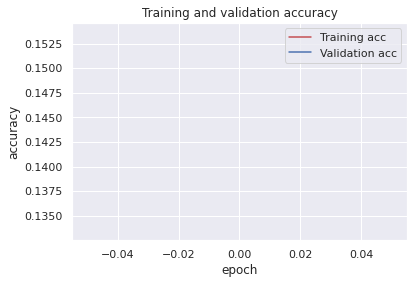

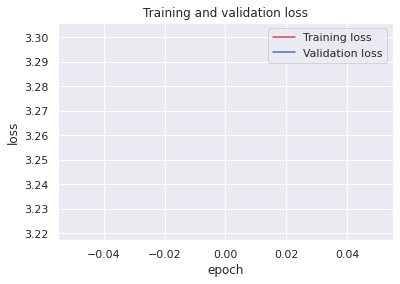

In [42]:
#Graphing our training and validation
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
#model.save("animal_classification_model.h5")#save model

In [ ]:
from keras.preprocessing import image
test_image = image.load_img("../input/animal-classification/butterfly/butterfly/buttefly.1001.jpeg",target_size=(64,64))
test_image 


In [ ]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

In [ ]:
result = model.predict(test_image)

my_dict=training_set.class_indices
def get_key(val): 
    for key, value in my_dict.items(): 
         if val == value: 
             return key 
  
    return "key doesn't exist"

pred=list(result[0])
for i in range(len(pred)):
    if pred[i]!=0:
        print(get_key(i))

In [ ]:

import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline
dataset1 = ImageFolder('./train_data/', transform=ToTensor())
print('Size of training dataset :', len(dataset1))
dataset2 = ImageFolder('./test_data/', transform=ToTensor())
print('Size of test dataset :', len(dataset2))